## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

---
---
## Loading Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
#loading data
data = pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
data.shape

(28382, 21)

# Missing value imputation

In [4]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [5]:
data.isnull().sum()/data.shape[0]

customer_id                       0.000000
vintage                           0.000000
age                               0.000000
gender                            0.018498
dependents                        0.086780
occupation                        0.002819
city                              0.028293
customer_nw_category              0.000000
branch_code                       0.000000
days_since_last_transaction       0.113558
current_balance                   0.000000
previous_month_end_balance        0.000000
average_monthly_balance_prevQ     0.000000
average_monthly_balance_prevQ2    0.000000
current_month_credit              0.000000
previous_month_credit             0.000000
current_month_debit               0.000000
previous_month_debit              0.000000
current_month_balance             0.000000
previous_month_balance            0.000000
churn                             0.000000
dtype: float64

highest no of missing value is in last transaction column which is around 11.3%, so we should not drop any column here based on missing value ratio.

In [6]:
#lets check one by one now
#gender
data.gender.value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

so there is a good mixture of male and female, also in this column just imputing missing values by mode might not be most appropriate, since missing value may indicate any gender apart from male or feamale
- also , these missing value may also show us some new pattern in customer churn which we may not be able to see if we just impute mode here.
- so let's first convert it to numeric and then create new category -1 for them

In [7]:
dict_gender = {'Male': 1, 'Female': 0}
data.replace({'gender': dict_gender}, inplace = True)
data.gender.fillna(-1, inplace = True)

In [8]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [9]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                            float64
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [10]:
data.dependents.value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [11]:
data.dependents.fillna(0, inplace = True)

In [12]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [13]:
data.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [14]:
data.occupation.fillna('self_employed', inplace = True)

In [15]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [16]:
data.city.value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: city, Length: 1604, dtype: int64

In [17]:
data.city.fillna(1020, inplace = True)

In [18]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

#### Days since Last Transaction
A fair assumption can be made on this column as this is number of days since last transaction in 1 year, we can substitute missing values with a value greater than 1 year say 999

In [19]:
data.days_since_last_transaction.fillna(999, inplace = True)

# preprocessing 

In [20]:
# Convert occupation to one hot encoded features
data = pd.concat([data,pd.get_dummies(data['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

Now, we remember from EDA that there are a lot of outliers in the dataset especially when it comes to previous and current balance features. Also, the distributions are skewed for these features, so lets do scaling ad transformation here in order to deal with this.

In [21]:
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    data[i] = np.log(data[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [22]:
df_df_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [23]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1.0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,1.0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,1.0,0.0,salaried,146.0,41,999.0,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,582,147.0,1,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,1.0,2.0,self_employed,1494.0,388,58.0,1,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [24]:
y_all = data.churn
data = data.drop(['churn','customer_id','occupation'],axis = 1)

# model building and evaluation metric
since, this is a binary classification problem, we will be using majorly two metric from the business perspective.
- Recall
- AUC-ROC

AUC-ROC to compare the performance of the different models we trained.
Recall because if a customer is marked as churn and he is actually not churning is not that bad as he may get some extra services or calls in that condition, but if a customer is marked as not churn but he is actually churning will cost the client to its business, so ***false negative*** is something ,which we want to minimize.

### Conclusions from EDA
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
* For all the balance features the lower values have much higher proportion of churning customers
* For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 
* We  have seen significant difference for different occupations wrt churning

# Baseline columns

In [25]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [26]:
df_baseline = data[baseline_cols]

# train test split to create validation set

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline, y_all, test_size = 1/3, stratify = y_all, random_state = 42)

In [28]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

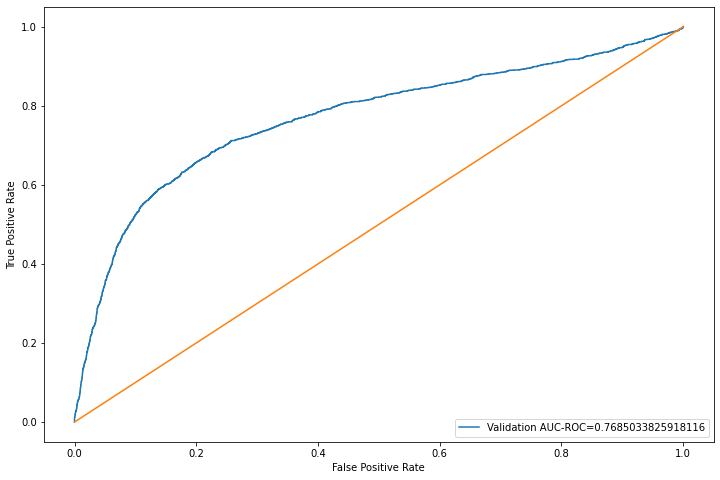

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [30]:
# Confusion Matrix
pred_val = model.predict(xtest)

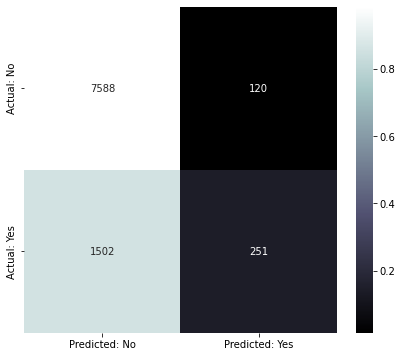

In [31]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [32]:
# Recall Score
recall_score(ytest,pred_val)

0.14318311466058187

In [33]:
accuracy_score(ytest,pred_val)

0.8285593489060353

In [34]:
#we can clearly see that even if my accuracy score is 82% which could be considered as good , my recall is just 13% which is not 
#desired from the businees point of view , so we really need to improve on it(large no. of false negative)

# K-fold cross validation

In [35]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = data.columns):
    i = 1
    cv_scores = []
    df1 = data.copy()
    df1 = data[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        accuracy = accuracy_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f}, Accuracy: {:.4f} ".format(roc_score, recall,precision, accuracy)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [36]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5
ROC AUC Score: 0.7644836090843695, Recall Score: 0.0751, Precision Score: 0.5766, Accuracy: 0.8184 

2 of kfold 5
ROC AUC Score: 0.7798111191038948, Recall Score: 0.0751, Precision Score: 0.6695, Accuracy: 0.8217 

3 of kfold 5
ROC AUC Score: 0.7552480774797059, Recall Score: 0.1350, Precision Score: 0.6425, Accuracy: 0.8258 

4 of kfold 5
ROC AUC Score: 0.7582093590064074, Recall Score: 0.1169, Precision Score: 0.6508, Accuracy: 0.8247 

5 of kfold 5
ROC AUC Score: 0.7622096073387978, Recall Score: 0.1103, Precision Score: 0.5800, Accuracy: 0.8203 


In [37]:
# lets try with a different threshold
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols, thres = 0.6)
#recall has decreased significantly


1 of kfold 5
ROC AUC Score: 0.7644836090843695, Recall Score: 0.0532, Precision Score: 0.6364, Accuracy: 0.8189 

2 of kfold 5
ROC AUC Score: 0.7798111191038948, Recall Score: 0.0475, Precision Score: 0.6579, Accuracy: 0.8189 

3 of kfold 5
ROC AUC Score: 0.7552480774797059, Recall Score: 0.0856, Precision Score: 0.6040, Accuracy: 0.8201 

4 of kfold 5
ROC AUC Score: 0.7582093590064074, Recall Score: 0.0732, Precision Score: 0.6581, Accuracy: 0.8212 

5 of kfold 5
ROC AUC Score: 0.7622096073387978, Recall Score: 0.0779, Precision Score: 0.5942, Accuracy: 0.8192 


In [38]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols, thres = 0.4)
#recall score has improved significantly


1 of kfold 5
ROC AUC Score: 0.7644836090843695, Recall Score: 0.1198, Precision Score: 0.5650, Accuracy: 0.8198 

2 of kfold 5
ROC AUC Score: 0.7798111191038948, Recall Score: 0.1293, Precision Score: 0.6800, Accuracy: 0.8274 

3 of kfold 5
ROC AUC Score: 0.7552480774797059, Recall Score: 0.2196, Precision Score: 0.6311, Accuracy: 0.8316 

4 of kfold 5
ROC AUC Score: 0.7582093590064074, Recall Score: 0.1930, Precision Score: 0.6444, Accuracy: 0.8307 

5 of kfold 5
ROC AUC Score: 0.7622096073387978, Recall Score: 0.1854, Precision Score: 0.5702, Accuracy: 0.8231 


In [39]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols, thres = 0.3)
# recall score is improving which is quite intuitive as well becaue if we are treating everyhing as positive, false negative will
# decrease automatically


1 of kfold 5
ROC AUC Score: 0.7644836090843695, Recall Score: 0.2319, Precision Score: 0.5533, Accuracy: 0.8230 

2 of kfold 5
ROC AUC Score: 0.7798111191038948, Recall Score: 0.2452, Precision Score: 0.6719, Accuracy: 0.8379 

3 of kfold 5
ROC AUC Score: 0.7552480774797059, Recall Score: 0.3878, Precision Score: 0.6062, Accuracy: 0.8399 

4 of kfold 5
ROC AUC Score: 0.7582093590064074, Recall Score: 0.3317, Precision Score: 0.5895, Accuracy: 0.8333 

5 of kfold 5
ROC AUC Score: 0.7622096073387978, Recall Score: 0.3270, Precision Score: 0.5811, Accuracy: 0.8316 


In [40]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols, thres = 0.2)
# now we can see that , on putting threshold as 0.2 , accuracy has decreased significantly , whereas recall score has improved significantly
#so its really not a good idea to put threshold as 0.2


1 of kfold 5
ROC AUC Score: 0.7644836090843695, Recall Score: 0.5722, Precision Score: 0.4725, Accuracy: 0.8024 

2 of kfold 5
ROC AUC Score: 0.7798111191038948, Recall Score: 0.6340, Precision Score: 0.4894, Accuracy: 0.8096 

3 of kfold 5
ROC AUC Score: 0.7552480774797059, Recall Score: 0.6435, Precision Score: 0.4076, Accuracy: 0.7606 

4 of kfold 5
ROC AUC Score: 0.7582093590064074, Recall Score: 0.6369, Precision Score: 0.3998, Accuracy: 0.7555 

5 of kfold 5
ROC AUC Score: 0.7622096073387978, Recall Score: 0.6378, Precision Score: 0.4288, Accuracy: 0.7754 


# training model on all the features available

In [41]:
#lets try to run the model on all the features
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.7331285582160108, Recall Score: 0.1093, Precision Score: 0.5044, Accuracy: 0.8150 

2 of kfold 5
ROC AUC Score: 0.767930531291748, Recall Score: 0.1968, Precision Score: 0.6832, Accuracy: 0.8342 

3 of kfold 5
ROC AUC Score: 0.7392551015038088, Recall Score: 0.1683, Precision Score: 0.5728, Accuracy: 0.8226 

4 of kfold 5
ROC AUC Score: 0.7303938699725026, Recall Score: 0.1093, Precision Score: 0.6216, Accuracy: 0.8226 

5 of kfold 5
ROC AUC Score: 0.7588244339337166, Recall Score: 0.1730, Precision Score: 0.5987, Accuracy: 0.8252 


In [42]:
#lets try with the threshold of 0.3 which has given the best result in baseline model
all_feat_scores = cv_score(LogisticRegression(), thres = 0.3)
#we can see almost the same accuracy but the recall score has improved


1 of kfold 5
ROC AUC Score: 0.7331285582160108, Recall Score: 0.3945, Precision Score: 0.4663, Accuracy: 0.8041 

2 of kfold 5
ROC AUC Score: 0.767930531291748, Recall Score: 0.4971, Precision Score: 0.5883, Accuracy: 0.8423 

3 of kfold 5
ROC AUC Score: 0.7392551015038088, Recall Score: 0.4705, Precision Score: 0.4960, Accuracy: 0.8132 

4 of kfold 5
ROC AUC Score: 0.7303938699725026, Recall Score: 0.3707, Precision Score: 0.5039, Accuracy: 0.8157 

5 of kfold 5
ROC AUC Score: 0.7588244339337166, Recall Score: 0.4259, Precision Score: 0.5470, Accuracy: 0.8282 


# feature selection
- We have already built a model using all the features and a separate model using some baseline features. We can try using backward feature elimination to check if we can do better, so will use rfe
- then further will use boruta which is an all important feature selection algorithm

In [43]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(data, y_all)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [44]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = data.columns
ranking_df['Rank'] = rfe.ranking_

In [45]:
ranked = ranking_df.sort_values(by=['Rank'])

In [46]:
ranked

,Feature_name,Rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
7,occupation_company,3
15,average_monthly_balance_prevQ2,4
21,current_month_balance,5
22,previous_month_balance,6
19,current_month_debit,7
8,occupation_retired,8
20,previous_month_debit,9
11,occupation_student,10


In [47]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.798970712157024, Recall Score: 0.2310, Precision Score: 0.7275, Accuracy: 0.8415 

2 of kfold 5
ROC AUC Score: 0.8074165039564278, Recall Score: 0.2215, Precision Score: 0.7565, Accuracy: 0.8425 

3 of kfold 5
ROC AUC Score: 0.7999824440512058, Recall Score: 0.2281, Precision Score: 0.7186, Accuracy: 0.8404 

4 of kfold 5
ROC AUC Score: 0.7945403054981779, Recall Score: 0.2082, Precision Score: 0.7300, Accuracy: 0.8390 

5 of kfold 5
ROC AUC Score: 0.7947917214861789, Recall Score: 0.1930, Precision Score: 0.6700, Accuracy: 0.8328 


# we can see much improvment in our score of roc and auc as well as precision and recall

In [48]:
# lets try with the different threshold as well
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values, thres = 0.3)
#our accuracy has imroved as well as recall with certain sacrifice with precision score


1 of kfold 5
ROC AUC Score: 0.798970712157024, Recall Score: 0.4629, Precision Score: 0.6165, Accuracy: 0.8471 

2 of kfold 5
ROC AUC Score: 0.8074165039564278, Recall Score: 0.4572, Precision Score: 0.6634, Accuracy: 0.8564 

3 of kfold 5
ROC AUC Score: 0.7999824440512058, Recall Score: 0.4743, Precision Score: 0.6644, Accuracy: 0.8582 

4 of kfold 5
ROC AUC Score: 0.7945403054981779, Recall Score: 0.4781, Precision Score: 0.6295, Accuracy: 0.8511 

5 of kfold 5
ROC AUC Score: 0.7947917214861789, Recall Score: 0.4240, Precision Score: 0.6299, Accuracy: 0.8471 


- We observe that there is continuous improvement in the Recall Score. However, clearly precision score is going down. On the basis of business requirement the bank can take a call on deciding the threshold. Without knowing the metrics relevant to the business, our best course of action should to optimize for AUC ROC Score so as to find the best probabilites here.
- and if the target is to get the best recall as guessed earlier , even then we need to look at the trade off of precision recall and try to come up with the value which also dont harm much my precision

In [49]:
# comparison of different model fold wise
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})

<AxesSubplot:>

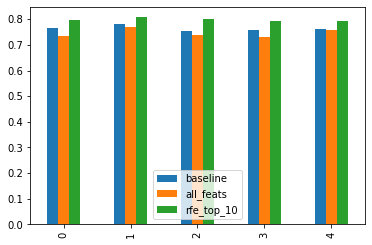

In [50]:
results_df.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar")

# let's try with the decision tree now

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt_model = DecisionTreeClassifier(random_state=10)

In [53]:
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=10)

In [54]:
#checking the training score
dt_model.score(xtrain, ytrain) #overfitting

1.0

In [55]:
#checking the training score
dt_model.score(xtest, ytest) # we can clearly see the case of overfitting here

0.7782475425430716

In [56]:
#let's see the baseline model cv score now
baselinedt_score = cv_score(DecisionTreeClassifier(random_state=10), cols = baseline_cols)
# avg. auc roc score that we are getting here from decision tree is lesser than logistic refression


1 of kfold 5
ROC AUC Score: 0.631834035556469, Recall Score: 0.4040, Precision Score: 0.3957, Accuracy: 0.7752 

2 of kfold 5
ROC AUC Score: 0.6595515363272018, Recall Score: 0.4601, Precision Score: 0.4261, Accuracy: 0.7851 

3 of kfold 5
ROC AUC Score: 0.6329026438354362, Recall Score: 0.3992, Precision Score: 0.4050, Accuracy: 0.7800 

4 of kfold 5
ROC AUC Score: 0.6390764173036694, Recall Score: 0.4211, Precision Score: 0.4013, Accuracy: 0.7763 

5 of kfold 5
ROC AUC Score: 0.6479357986764377, Recall Score: 0.4354, Precision Score: 0.4152, Accuracy: 0.7817 


In [57]:
#on the whole dataset
alldt_score = cv_score(DecisionTreeClassifier(random_state = 10))
#here as well the score we are getting is much lesser than what we were getting from logistic regression


1 of kfold 5
ROC AUC Score: 0.6638700030829309, Recall Score: 0.4743, Precision Score: 0.4240, Accuracy: 0.7832 

2 of kfold 5
ROC AUC Score: 0.6567855307779262, Recall Score: 0.4563, Precision Score: 0.4211, Accuracy: 0.7830 

3 of kfold 5
ROC AUC Score: 0.6629537411027933, Recall Score: 0.4591, Precision Score: 0.4395, Accuracy: 0.7912 

4 of kfold 5
ROC AUC Score: 0.6659337297880458, Recall Score: 0.4677, Precision Score: 0.4393, Accuracy: 0.7907 

5 of kfold 5
ROC AUC Score: 0.6679857611798912, Recall Score: 0.4724, Precision Score: 0.4406, Accuracy: 0.7911 


In [58]:
#lets try RFE on decision tree
model = DecisionTreeClassifier(random_state = 10)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(data, y_all)

RFE(estimator=DecisionTreeClassifier(random_state=10), n_features_to_select=1)

In [59]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = data.columns
ranking_df['Rank'] = rfe.ranking_

In [60]:
ranked = ranking_df.sort_values(by = ['Rank'])


In [61]:
ranked

,Feature_name,Rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
15,average_monthly_balance_prevQ2,3
0,vintage,4
19,current_month_debit,5
22,previous_month_balance,6
5,branch_code,7
17,current_month_credit,8
20,previous_month_debit,9
18,previous_month_credit,10


In [62]:
rfe_top_10_scores = cv_score(DecisionTreeClassifier(random_state = 10), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.6739834549378276, Recall Score: 0.4876, Precision Score: 0.4426, Accuracy: 0.7913 

2 of kfold 5
ROC AUC Score: 0.6658442092282396, Recall Score: 0.4582, Precision Score: 0.4517, Accuracy: 0.7965 

3 of kfold 5
ROC AUC Score: 0.6461880155775126, Recall Score: 0.4278, Precision Score: 0.4182, Accuracy: 0.7837 

4 of kfold 5
ROC AUC Score: 0.6654559777388925, Recall Score: 0.4715, Precision Score: 0.4328, Accuracy: 0.7875 

5 of kfold 5
ROC AUC Score: 0.6545268856815819, Recall Score: 0.4449, Precision Score: 0.4270, Accuracy: 0.7865 


# the average score has improved a bit , but still its lesser than what we have got from best set of logistic regression

In [66]:
y_all.value_counts(normalize = True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

# KNN

In [76]:
# lets start with random initialization of 10 neighbours
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [68]:
clf = KNN(n_neighbors = 10)
clf.fit(xtrain, ytrain)
pred_val = clf.predict(xtest)
accuracy_score(pred_val, ytest)

0.8141845470880457

In [69]:
recall_score(pred_val, ytest)

#we can see that overall performance of baseline model of KNN is so far better than decision tree and marginal better than logistic

0.44680851063829785

In [89]:
# lets try to find the optimal value k now by elbow method
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(xtrain, ytrain)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(xtest)
        tmp = recall_score(tmp,ytest)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [91]:
#Defining K range
k = range(2, 20, 2)

In [92]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

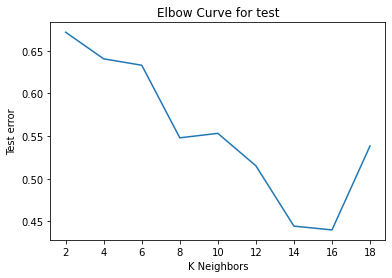

In [93]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')
#lets try at the n neighbours = 14

In [94]:
clf = KNN(n_neighbors = 14)
clf.fit(xtrain, ytrain)
pred_val = clf.predict(xtest)
accuracy_score(pred_val, ytest)

0.8150301236655745

In [96]:
recall_score(pred_val, ytest)

0.5555555555555556

In [98]:
# k-fold with KNN on baseline model and neighbour = 14
baselineknn_scores = cv_score(KNN(n_neighbors = 14))
#we can clearly see the ROC score is  worst.


1 of kfold 5
ROC AUC Score: 0.536802486897544, Recall Score: 0.0029, Precision Score: 0.1765, Accuracy: 0.8128 

2 of kfold 5
ROC AUC Score: 0.5395816462850682, Recall Score: 0.0038, Precision Score: 0.2667, Accuracy: 0.8135 

3 of kfold 5
ROC AUC Score: 0.5304243153591116, Recall Score: 0.0067, Precision Score: 0.2800, Accuracy: 0.8127 

4 of kfold 5
ROC AUC Score: 0.5358397293999236, Recall Score: 0.0010, Precision Score: 0.0526, Accuracy: 0.8117 

5 of kfold 5
ROC AUC Score: 0.5452851998829055, Recall Score: 0.0057, Precision Score: 0.4000, Accuracy: 0.8141 
